<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [230]:
function binomial_p(n,k,p)
    P=((factorial(n)/(factorial(k)*factorial(n-k))*p.^k*(1-p).^(n-k)))
    return(P)
    end 

binomial_p (generic function with 1 method)

The chance of winning the bet:

In [231]:
# Calcualtion explained: 10 total trials, chance of winning when P(X=5), with each success chance being 0.4 
chance_win = binomial_p(10,5,0.4)
chance_win=0.20065812480000003

0.20065812480000003

The chance of losing the bet:

In [232]:
chance_lose=1-chance_win

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [233]:
# mu = E[X] = n*p
# n: number of trials
# p: probability of success
expected_outcome=10*0.4

4.0

The expected outcome of the game is 4, meaning 4 heads. Therefore, I expect myself losing money in the game, because the winning outcome is equal to 5 heads.

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [235]:
# probability of winning
chance_winning=binomial_p(10, 4, 0.4)
chance_winning=0.250822656

0.250822656

In [236]:
chance_losing=1-chance_winning

0.749177344

In [13]:
chance_losing=0.21499084799999996 + 0.12093235199999998 + 0.04031078399999999 + 0.006046617599999998
print("Chance of losing: ", chance_losing)

Chance of losing: 0.3822806015999999

In [14]:
# mu = E[X] = n*p
# n: number of trials
# p: probability of success
expected_outcome=10*0.4

4.0

The expected outcome of the game is still 4, because the winning probability did not change.Therefore, I expect myself to win money in this case. 

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [188]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `C:\Users\julia\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\julia\.julia\environments\v1.8\Manifest.toml`


In [189]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [190]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [195]:
using Polynomials
# Fit data with first order polynomial
line_fit=fit(x,y_observed,1)
fit_coeff=coeffs(line_fit)

2-element Vector{Float64}:
 1.4216064851199568
 2.81679369883113

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [196]:
function chisqr(b,m,x,y_observed, sigma)
    chivalue = sum((y_observed.- m.*x .-b ).^2/sigma.^2)
end 

chisqr (generic function with 1 method)

In [197]:
chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)

10.439384475778931

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [198]:
# Create an empty list
chi2_list=[]

# run through data simulation and model fitting 10000 times
for i in 1:10000
    sigma=3
    y_observed = y_true .+ rand(di.Normal(0,sigma),length(x))
    fit_coeff=coeffs(fit(x,y_observed,1))
    chi2=chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)
    push!(chi2_list,chi2)
end 

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [199]:
# Calculate mean value of chi2_list
mean_value = mean(chi2_list)

8.970279846139652

Yes, this degree of freedom makes sense. Df=N-P , where P is the number of differnet parameters and N is # of samples (x values in our case). the N=length(x)=11, and we have 2 parameters. Therefore, 11-2 is 9.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

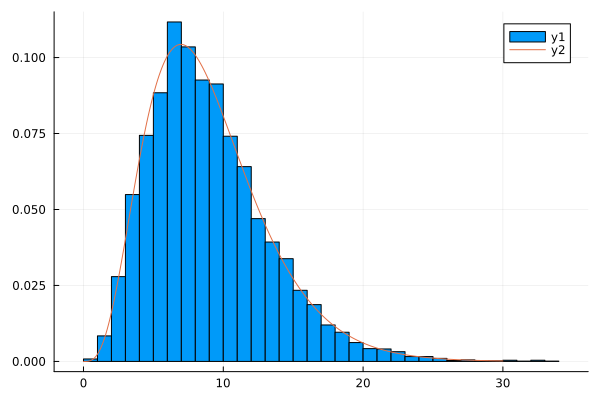

In [220]:
# define chi square distribution using degree of freedom from 2.4
chi_val=di.Chisq(mean_value)

# Generate x_dist
x_dist=0:0.1:30

# calculate pdf
pdf_val=pdf.(chi_val,x_dist)

# plot chi2_list in histogram with bin=50
using Plots
histogram(chi2_list, bin=50, normalize=true)

# plot pdf on top of chi_2 list in histogram
plot!(x_dist,pdf_val)

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [245]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

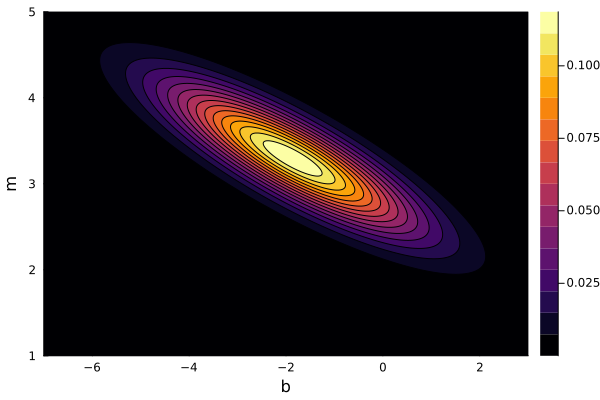

In [246]:
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

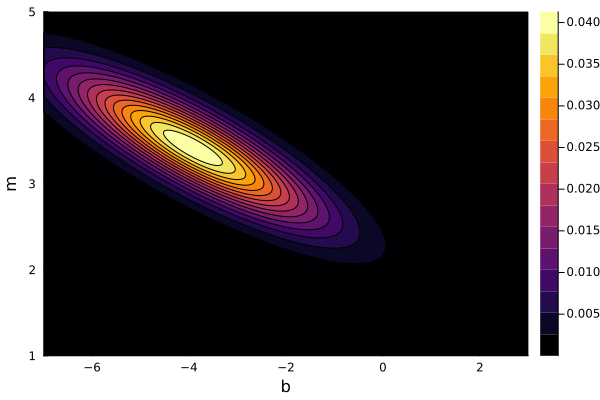

In [247]:
# redefine x and update y observed
x=0:0.5:5
y_true = 3 .* x .- 2
sigma=3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

This graph covers more range on the m axis. In addition, range of x is smaller than 2.6, which tells us that elongation from the circles is due to these changes.

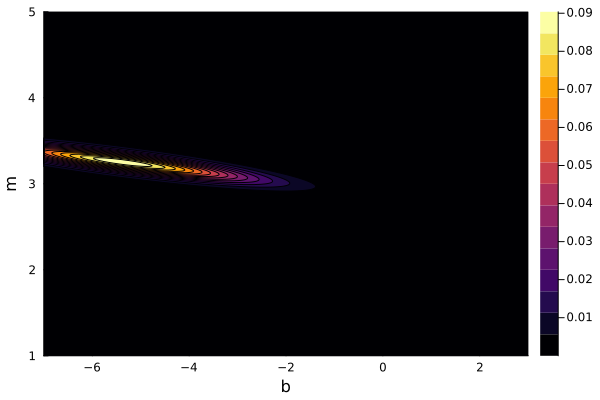

In [248]:
# redefine x and update y observed
x=0:2:20
y_true = 3 .* x .- 2
sigma=3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

This plot does not cover as much vertical distance as in 2.6. The changes to the circle are largely due to the additional x values that are included, making the circles thinner.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

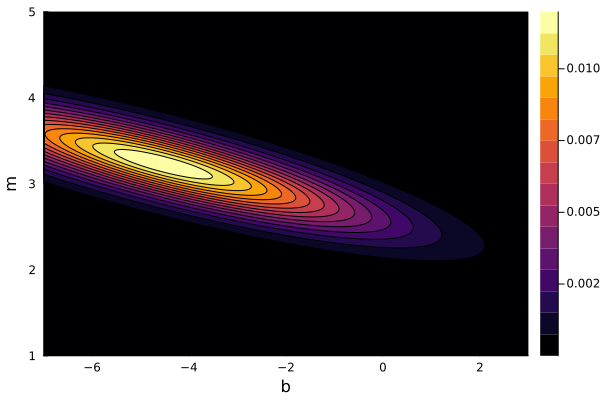

In [238]:
x=0:1:10
y_true = 3 .* x .- 2
sigma=5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The largest change here is the alteration of the sigma value, which makes the graph very wide that some of it is cut off on the left side. Changing sigma to make it larger influences the graph in the b direction, as it increases the noise.

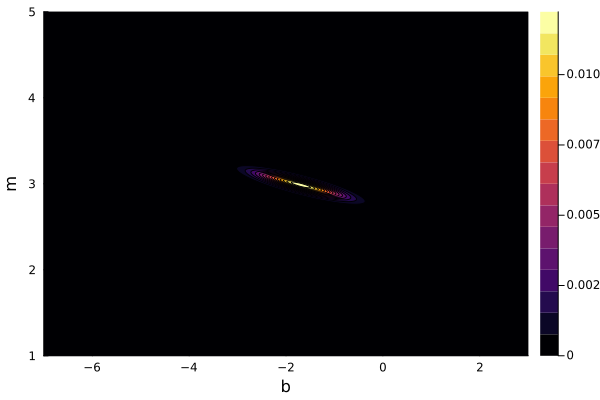

In [249]:
x=0:1:10
y_true = 3 .* x .- 2
sigma=1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

This graph becomes much tinier than in 2.6. The sigma value being 1 reduces our noise, and therefore the graph is shrinking in the b direction significantly. Additionally, it holds a small range in the m range too. 